## 抓取新浪新聞列表

In [6]:
import requests
res = requests.get('http://news.sina.com.cn/china/')
res.encoding = 'utf-8'
#print(res.text)

In [34]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(res.text, 'html.parser')
for news in soup.select('.news-item'):    
    if len(news.select('h2')) > 0:
        #print(news)    
        h2 = news.select('h2')[0].text                
        a = news.select('a')[0]['href']        
        time = news.select('.time')[0].text
        
        #print(time, h2, a)
        #print('==================================')

## 抓取新聞內文

In [29]:
import requests
from bs4 import BeautifulSoup
res = requests.get('http://news.sina.com.cn/c/2016-11-10/doc-ifxxsfip4305308.shtml')
res.encoding = 'utf-8'
#print(res.text)
soup = BeautifulSoup(res.text, 'html.parser')

In [35]:
soup.select('#artibodyTitle')[0].text

'美媒：中国在打造自己的TPP并一直在扩大'

In [50]:
timesource = soup.select('.time-source')[0].contents[0].strip()
timesource

'2016年11月10日04:14'

In [51]:
medianame = soup.select('.time-source')[0].contents[1].text.strip()
medianame

'环球时报'

## Python strptime and strftime
- https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

In [61]:
from datetime import datetime 
current_time = datetime.now()
current_time

datetime.datetime(2016, 11, 10, 9, 50, 14, 572769)

In [62]:
dt = datetime.strptime('2016年11月10日04:14', '%Y年%m月%d日%H:%M')
print(type(dt))
dt

<class 'datetime.datetime'>


datetime.datetime(2016, 11, 10, 4, 14)

In [64]:
print(dt - current_time)

-1 day, 18:23:45.427231


In [60]:
print(type(dt.strftime('%B %d, %Y')))
dt.strftime('%B %d, %Y')

<class 'str'>


'November 10, 2016'

In [66]:
from datetime import datetime, timedelta
current_time = datetime.now()
current_time + timedelta(days = 1)

datetime.datetime(2016, 11, 11, 9, 52, 29, 648495)

In [68]:
current_time + timedelta(days = -1)

datetime.datetime(2016, 11, 9, 9, 52, 29, 648495)

In [70]:
current_time + timedelta(days = -30)

datetime.datetime(2016, 10, 11, 9, 52, 29, 648495)

In [72]:
for d in range(1,10):
    print((current_time + timedelta(days = -d)).strftime('%Y-%m-%d'))

2016-11-09
2016-11-08
2016-11-07
2016-11-06
2016-11-05
2016-11-04
2016-11-03
2016-11-02
2016-11-01


In [77]:
import time
t = (2009, 2, 17, 17, 3, 38, 1, 48, 0)
secs = time.mktime( t )
secs

1234861418.0

In [79]:
time.mktime(current_time.timetuple())

1478742749.0

In [86]:
dt = datetime.fromtimestamp(1478742749)
dt.strftime('%Y/%m/%d')

'2016/11/10'

## 取得內文

In [91]:
a = [1,2,3,4,5]
# 取第一筆資料
a[0]

1

In [92]:
# 取最後一筆資料
a[-1]

5

In [93]:
# 從第二個以後開始取資料
a[1:] # for(i = 1; i< len; i ++)

[2, 3, 4, 5]

In [94]:
#最後一筆我不要
a[:-1] # for(i = 0 ; i< last one, i++)

[1, 2, 3, 4]

In [102]:
# 最後一個p 不要
article = []
for p in soup.select('#artibody p')[:-1]:
    article.append(p.text.strip())
' '.join(article)

'原标题：美媒：中国在打造自己的TPP，并一直在扩大 总统竞选期间，我们不断听到对跨太平洋伙伴关系协定的攻击。对TPP的争论不少都围绕中国展开。支持者把它视为战略性而非经济的条约，认为对遏制中国不可缺少。反对者把它看成威胁，认为可能会鼓励签署国让中国借由“后门”进入。事实上，这两种看法都错了，错的原因也一样。TPP对拖慢中国的经济和政治力量的崛起并无助益，对美国工人的影响也微乎其微。原因在于，TPP对中国并不重要。 正如新加坡投资人吉姆·伊斯坎所分析，TPP谈判的8年间，北京并非无所作为。中国一直在发展与亚太地区国家的经贸关系，构筑牢固的贸易网络。如今，在美国忙于争论TPP利弊之际，中国已与12个TPP签约国中的9个签订自贸协定。美国在说，中国在做。当华盛顿还在争论TPP是遏制中国的最佳方式还是中国经济帝国主义的特洛伊木马时，中国人已建起自己的TPP，并一直在扩大。 中国还在构建与贸易伙伴的新纽带——物理上的连接，包括机场、道路和港口，提供从混凝土、钢铁到融资的一切所需。波士顿咨询集团高级合伙人哈罗尔德·西尔金称，“一带一路”倡议加强中国与别国的关系的同时，美国显然在后退。西尔金警告：“美国应竭力去做成功竞争所必要的事，否则将陷入衰落。如果我们在贸易方面耍大牌，那就给中国人开了方便之门，他们有准备也有意愿和能力填充我们造成的任何空缺。” 此种背景下，不禁让人担心，像中国这样的国家多久会成为主导该地区的经济强国。现在，拉美超过10%的出口流向中国，近18%进口源自中国。一个共产党威权国家让托马斯·杰斐逊的国度领教了什么才是自由贸易，这也算目前混乱时代的奇事。'

In [104]:
''.join([p.text.strip() for p in soup.select('#artibody p')[:-1]])

'原标题：美媒：中国在打造自己的TPP，并一直在扩大总统竞选期间，我们不断听到对跨太平洋伙伴关系协定的攻击。对TPP的争论不少都围绕中国展开。支持者把它视为战略性而非经济的条约，认为对遏制中国不可缺少。反对者把它看成威胁，认为可能会鼓励签署国让中国借由“后门”进入。事实上，这两种看法都错了，错的原因也一样。TPP对拖慢中国的经济和政治力量的崛起并无助益，对美国工人的影响也微乎其微。原因在于，TPP对中国并不重要。正如新加坡投资人吉姆·伊斯坎所分析，TPP谈判的8年间，北京并非无所作为。中国一直在发展与亚太地区国家的经贸关系，构筑牢固的贸易网络。如今，在美国忙于争论TPP利弊之际，中国已与12个TPP签约国中的9个签订自贸协定。美国在说，中国在做。当华盛顿还在争论TPP是遏制中国的最佳方式还是中国经济帝国主义的特洛伊木马时，中国人已建起自己的TPP，并一直在扩大。中国还在构建与贸易伙伴的新纽带——物理上的连接，包括机场、道路和港口，提供从混凝土、钢铁到融资的一切所需。波士顿咨询集团高级合伙人哈罗尔德·西尔金称，“一带一路”倡议加强中国与别国的关系的同时，美国显然在后退。西尔金警告：“美国应竭力去做成功竞争所必要的事，否则将陷入衰落。如果我们在贸易方面耍大牌，那就给中国人开了方便之门，他们有准备也有意愿和能力填充我们造成的任何空缺。”此种背景下，不禁让人担心，像中国这样的国家多久会成为主导该地区的经济强国。现在，拉美超过10%的出口流向中国，近18%进口源自中国。一个共产党威权国家让托马斯·杰斐逊的国度领教了什么才是自由贸易，这也算目前混乱时代的奇事。'

In [103]:
a= [1,2,3,4,5]
[ele * 2 for ele in a]

[2, 4, 6, 8, 10]

## 抽取責任編輯

In [109]:
editor = soup.select('.article-editor')[0].text.strip('责任编辑：')
editor

'隗俊 '

## 抽取評論數

In [110]:
soup.select('#commentCount1')

[<span id="commentCount1"></span>]

In [134]:
import requests
import json
res = requests.get('http://comment5.news.sina.com.cn/page/info?version=1&format=js&channel=gn&newsid=comos-fxxsfip4305308&group=&compress=0&ie=utf-8&oe=utf-8&page=1&page_size=20')
comments = res.text.strip('var data=')
json.loads(comments)['result']['count']['total']

6

In [125]:
# ifxxsfip4305308
newsurl = 'http://news.sina.com.cn/c/2016-11-10/doc-ifxxsfip4305308.shtml'

In [135]:
newsurl.split('/')[-1].lstrip('doc-i').rstrip('.shtml')

'fxxsfip4305308'

## 正規表達法

In [137]:
'apple' == 'apple'

True

In [139]:
import re
s = 'a'
print(re.search('a', s))

s = 'b'
print(re.search('a', s))

<_sre.SRE_Match object; span=(0, 1), match='a'>
None


In [140]:
# [abc] => a or b or c
s = 'y'
print(re.search('[abcdefghijklmnopqrstuvwxyz]', s))

<_sre.SRE_Match object; span=(0, 1), match='y'>


In [141]:
# [abcdefghijklmnopqrstuvwxyz] = [a-z]
print(re.search('[a-z]', s))

<_sre.SRE_Match object; span=(0, 1), match='y'>


In [144]:
n = '5'
print(re.search('[0123456789]', n))

# [0123456789] => [0-9]
print(re.search('[0-9]', n))
# [0-9] = \d
print(re.search('\d', n))

<_sre.SRE_Match object; span=(0, 1), match='5'>
<_sre.SRE_Match object; span=(0, 1), match='5'>
<_sre.SRE_Match object; span=(0, 1), match='5'>


In [148]:
s = 'y'
print(re.search('[a-z]', s))

s = 'Y'
print(re.search('[a-z]', s))
print(re.search('[a-zA-Z]', s))
print(re.search('[a-zA-Z0-9]', s))

# [a-zA-Z0-9] => \w
print(re.search('\w', s))

<_sre.SRE_Match object; span=(0, 1), match='y'>
None
<_sre.SRE_Match object; span=(0, 1), match='Y'>
<_sre.SRE_Match object; span=(0, 1), match='Y'>
<_sre.SRE_Match object; span=(0, 1), match='Y'>


In [153]:
s = 'apple'
print(re.search('\w', s))

# match 5 alphabet => {}
print(re.search('\w{5}', s))


# {min ,max }
# e.g. match 3 ~ 6 
print(re.search('\w{3,6}', s))

# e.g. match 1 ~  
print(re.search('\w{1,}', s))
# {1,} => +
print(re.search('\w+', s))


# e.g. match 0 ~  
print(re.search('\w{0,}', s))
# {0,} => *
print(re.search('\w*', s))

<_sre.SRE_Match object; span=(0, 1), match='a'>
<_sre.SRE_Match object; span=(0, 5), match='apple'>
<_sre.SRE_Match object; span=(0, 5), match='apple'>
<_sre.SRE_Match object; span=(0, 5), match='apple'>
<_sre.SRE_Match object; span=(0, 5), match='apple'>
<_sre.SRE_Match object; span=(0, 5), match='apple'>
<_sre.SRE_Match object; span=(0, 5), match='apple'>


In [155]:
phones = ['0912345678','0912-345-678','0912-345678']
for phone in phones:
    print(re.match('09\d{8}' , phone))

<_sre.SRE_Match object; span=(0, 10), match='0912345678'>
None
None


In [156]:
phones = ['0912345678','0912-345-678','0912-345678']
for phone in phones:
    print(re.match('09\d{2}-{0,1}\d{3}-{0,1}\d{3}' , phone))

<_sre.SRE_Match object; span=(0, 10), match='0912345678'>
<_sre.SRE_Match object; span=(0, 12), match='0912-345-678'>
<_sre.SRE_Match object; span=(0, 11), match='0912-345678'>


In [157]:
# {0,1} => ?
for phone in phones:
    print(re.match('09\d{2}-?\d{3}-?\d{3}' , phone))

<_sre.SRE_Match object; span=(0, 10), match='0912345678'>
<_sre.SRE_Match object; span=(0, 12), match='0912-345-678'>
<_sre.SRE_Match object; span=(0, 11), match='0912-345678'>


In [160]:
p = '09123456780929038901830981098310923801230'
# ^ => match begin, $ => match end
re.match('^09\d{2}-?\d{3}-?\d{3}$' , p)

In [164]:
# fxxsfip4305308
newsurl = 'http://news.sina.com.cn/c/2016-11-10/doc-ifxxsfip4305308.shtml'
m = re.search('doc-i(\w+).shtml', newsurl)
# group(0) => match all paterns
print(m.group(0))

# group(1) => match pattern within first ()
print(m.group(1))

doc-ifxxsfip4305308.shtml
fxxsfip4305308


In [169]:
newsurl = 'http://news.sina.com.cn/c/2016-11-10/doc-ifxxsfip4305308.shtml'
commentURL = 'http://comment5.news.sina.com.cn/page/info?version=1&format=js&channel=gn&newsid=comos-{}&group=&compress=0&ie=utf-8&oe=utf-8&page=1&page_size=20'
print(newsurl)
print(commenturl)

http://news.sina.com.cn/c/2016-11-10/doc-ifxxsfip4305308.shtml
http://comment5.news.sina.com.cn/page/info?version=1&format=js&channel=gn&newsid=comos-fxxsfip4305308&group=&compress=0&ie=utf-8&oe=utf-8&page=1&page_size=20


## 建立一個抽取評論數的函式

In [28]:
def getCommentCount(newsurl):
    m = re.search('doc-i(\w+).shtml', newsurl)
    newsid = m.group(1)
    res = requests.get(commentURL.format(newsid))
    comments = res.text.strip('var data=')
    return json.loads(comments)['result']['count']['total']

In [173]:
s = 'http://news.sina.com.cn/c/nd/2016-11-09/doc-ifxxsmif2592720.shtml?cre=chinapc&mod=inf&loc=2&r=1&doct=0&rfunc=89&tj=none&s=0'
getCommentCount(s)

2780

## 建立新聞內容抽取函式

In [59]:
import requests
from bs4 import BeautifulSoup
from datetime import datetime
import re, json
newsurl = 'http://news.sina.com.cn/o/2016-11-10/doc-ifxxsmuu5252838.shtml'
commentURL = 'http://comment5.news.sina.com.cn/page/info?version=1&format=js&channel=gn&newsid=comos-{}&group=&compress=0&ie=utf-8&oe=utf-8&page=1&page_size=20'

def getNewsDetail(newsurl):
    result = {}
    res = requests.get(newsurl)
    res.encoding = 'utf-8'
    soup = BeautifulSoup(res.text, 'html.parser')
    result['title']      = soup.select('#artibodyTitle')[0].text
    result['newssource'] = soup.select('.time-source')[0].contents[1].text.strip()
    timesource           = soup.select('.time-source')[0].contents[0].strip()
    result['dt']         = datetime.strptime(timesource, '%Y年%m月%d日%H:%M')
    result['article']    = ''.join([p.text.strip() for p in soup.select('#artibody p')[:-1]])
    try:
        result['editor']     = soup.select('.article-editor')[0].text.lstrip('责任编辑：')
    except:
        print('editor not found')
    result['comments']   = getCommentCount(newsurl)
    return result 

In [39]:
getNewsDetail('http://news.sina.com.cn/o/2016-11-10/doc-ifxxsmuu5242123.shtml')

{'article': '原标题：台湾新北街头发生百人打群架事件 警方制止反被打中新网11月10日电 据台湾《中时电子报》报道，台湾新北市三重区正义北路9日晚10时许发生街头斗殴事件，目击者指出，两派人马疑似因为车祸纠纷发生争执，其中一方打电话找了数十人前往助阵。警方获报后赶抵现场制止，竟也遭殴打、咬伤，警方随后出动快打部队控制现场状况，并带回相关涉案人员侦办。9日新北市三重区正义北路晚上10点多传出集体打群架事件，有网友提供影片表示，现场疑似因车祸纠纷而引发斗殴，一名摩托车骑士左转撞上一名抱小孩过马路的父亲，骑士因口气很凶，引发许多人前来追打，警方获报到场维持秩序，斗殴的激烈场面被网友拍下。根据网友上传的影片可看到，现场车祸纠纷引发近百人打群架，大批警力前往维持秩序，警方到场后还一度场面失控，连警察都被拉扯。有网友表示，本来只是单纯车祸擦伤，但疑似骑士是因撞到三重角头（注：黑社会的头头），态度还很差，才会被上百人围殴。由于斗殴现场正位于三重人车量大的正义北路上，一群男子叫嚣殴打的声音吓坏经过的路人和附近住户，民众将过程拍下发上网，让不少网友直呼“治安败坏”、“三重日常”。',
 'comments': 44,
 'dt': datetime.datetime(2016, 11, 10, 10, 30),
 'editor': '康云凯 ',
 'newssource': '中国新闻网',
 'title': '台湾街头发生百人打群架 警方制止反被打(图)'}

In [41]:
a = 'http://api.roll.news.sina.com.cn/zt_list?channel=news&cat_1=gnxw&cat_2==gdxw1||=gatxw||=zs-pl||=mtjj&level==1||=2&show_ext=1&show_all=1&show_num=22&tag=1&format=json&page=8&callback=newsloadercallback&_=1478757941311'
a

'http://api.roll.news.sina.com.cn/zt_list?channel=news&cat_1=gnxw&cat_2==gdxw1||=gatxw||=zs-pl||=mtjj&level==1||=2&show_ext=1&show_all=1&show_num=22&tag=1&format=json&page=8&callback=newsloadercallback&_=1478757941311'

In [43]:
b = 'http://api.roll.news.sina.com.cn/zt_list?channel=news&cat_1=gnxw&cat_2==gdxw1||=gatxw||=zs-pl||=mtjj&level==1||=2&show_ext=1&show_all=1&show_num=22&tag=1&format=json&page=9&callback=newsloadercallback&_=1478757982735'
b

'http://api.roll.news.sina.com.cn/zt_list?channel=news&cat_1=gnxw&cat_2==gdxw1||=gatxw||=zs-pl||=mtjj&level==1||=2&show_ext=1&show_all=1&show_num=22&tag=1&format=json&page=9&callback=newsloadercallback&_=1478757982735'

## 整理API 資料

In [55]:
import requests
from bs4 import BeautifulSoup
import json
apiurl = 'http://api.roll.news.sina.com.cn/zt_list?channel=news&cat_1=gnxw&cat_2==gdxw1||=gatxw||=zs-pl||=mtjj&level==1||=2&show_ext=1&show_all=1&show_num=22&tag=1&format=json&page=8&callback=newsloadercallback'
res = requests.get(apiurl)
jd = json.loads(res.text.lstrip('  newsloadercallback(').rstrip(');'))
#jd

In [57]:
for ent in jd['result']['data']:
    print(ent['url'])

http://news.sina.com.cn/c/nd/2016-11-08/doc-ifxxmyuk6231660.shtml
http://news.sina.com.cn/c/nd/2016-11-08/doc-ifxxneua4415768.shtml
http://news.sina.com.cn/o/2016-11-08/doc-ifxxnffr7078585.shtml
http://news.sina.com.cn/o/2016-11-08/doc-ifxxnffr7077633.shtml
http://news.sina.com.cn/o/2016-11-08/doc-ifxxmyuk6228193.shtml
http://news.sina.com.cn/o/2016-11-08/doc-ifxxnffr7074289.shtml
http://news.sina.com.cn/c/nd/2016-11-08/doc-ifxxneua4410026.shtml
http://news.sina.com.cn/o/2016-11-08/doc-ifxxnffr7072674.shtml
http://news.sina.com.cn/c/nd/2016-11-08/doc-ifxxneua4407669.shtml
http://news.sina.com.cn/c/2016-11-08/doc-ifxxnffr7067804.shtml
http://news.sina.com.cn/o/2016-11-08/doc-ifxxnffr7066349.shtml
http://news.sina.com.cn/c/2016-11-08/doc-ifxxnffr7064444.shtml
http://news.sina.com.cn/c/zs/2016-11-08/doc-ifxxneua4396926.shtml
http://news.sina.com.cn/c/nd/2016-11-08/doc-ifxxneua4396922.shtml
http://news.sina.com.cn/c/nd/2016-11-08/doc-ifxxnffr7043222.shtml
http://news.sina.com.cn/o/2016-11-

## 剖析API 的 URL 連結

In [66]:
import requests
from bs4 import BeautifulSoup
import json
apiurl = 'http://api.roll.news.sina.com.cn/zt_list?channel=news&cat_1=gnxw&cat_2==gdxw1||=gatxw||=zs-pl||=mtjj&level==1||=2&show_ext=1&show_all=1&show_num=22&tag=1&format=json&page=8&callback=newsloadercallback'

def parseListLinks(url):
    newsdetails = []
    res = requests.get(url)
    jd = json.loads(res.text.lstrip('  newsloadercallback(').rstrip(');'))
    for ent in jd['result']['data']:
        newsdetails.append(getNewsDetail(ent['url']))
    return newsdetails

In [68]:
apiurl = 'http://api.roll.news.sina.com.cn/zt_list?channel=news&cat_1=gnxw&cat_2==gdxw1||=gatxw||=zs-pl||=mtjj&level==1||=2&show_ext=1&show_all=1&show_num=22&tag=1&format=json&page=8&callback=newsloadercallback'
#parseListLinks(apiurl)

In [71]:
apiformat = 'http://api.roll.news.sina.com.cn/zt_list?channel=news&cat_1=gnxw&cat_2==gdxw1||=gatxw||=zs-pl||=mtjj&level==1||=2&show_ext=1&show_all=1&show_num=22&tag=1&format=json&page={}&callback=newsloadercallback'
news_total = []
for page in range(1,3):
    news_total.extend(parseListLinks(apiformat.format(page)))

In [73]:
len(news_total)

44

In [80]:
news_total[20]

{'article': '原标题：台湾新北街头发生百人打群架事件 警方制止反被打中新网11月10日电 据台湾《中时电子报》报道，台湾新北市三重区正义北路9日晚10时许发生街头斗殴事件，目击者指出，两派人马疑似因为车祸纠纷发生争执，其中一方打电话找了数十人前往助阵。警方获报后赶抵现场制止，竟也遭殴打、咬伤，警方随后出动快打部队控制现场状况，并带回相关涉案人员侦办。9日新北市三重区正义北路晚上10点多传出集体打群架事件，有网友提供影片表示，现场疑似因车祸纠纷而引发斗殴，一名摩托车骑士左转撞上一名抱小孩过马路的父亲，骑士因口气很凶，引发许多人前来追打，警方获报到场维持秩序，斗殴的激烈场面被网友拍下。根据网友上传的影片可看到，现场车祸纠纷引发近百人打群架，大批警力前往维持秩序，警方到场后还一度场面失控，连警察都被拉扯。有网友表示，本来只是单纯车祸擦伤，但疑似骑士是因撞到三重角头（注：黑社会的头头），态度还很差，才会被上百人围殴。由于斗殴现场正位于三重人车量大的正义北路上，一群男子叫嚣殴打的声音吓坏经过的路人和附近住户，民众将过程拍下发上网，让不少网友直呼“治安败坏”、“三重日常”。',
 'comments': 49,
 'dt': datetime.datetime(2016, 11, 10, 10, 30),
 'editor': '康云凯 ',
 'newssource': '中国新闻网',
 'title': '台湾街头发生百人打群架 警方制止反被打(图)'}

## List Extend

In [70]:
a = [1,2,3]
b = [2,3]
a.extend(b)
a

[1, 2, 3, 2, 3]

## 完整新浪爬蟲

### 0. 引用套件

In [83]:
import requests
from bs4 import BeautifulSoup
import re, json
from datetime import datetime

### 1. 建立抓取內容頁函式

In [84]:
def getNewsDetail(newsurl):
    result = {}
    res = requests.get(newsurl)
    res.encoding = 'utf-8'
    soup = BeautifulSoup(res.text, 'html.parser')
    result['title']      = soup.select('#artibodyTitle')[0].text
    result['newssource'] = soup.select('.time-source')[0].contents[1].text.strip()
    timesource           = soup.select('.time-source')[0].contents[0].strip()
    result['dt']         = datetime.strptime(timesource, '%Y年%m月%d日%H:%M')
    result['article']    = ''.join([p.text.strip() for p in soup.select('#artibody p')[:-1]])
    try:
        result['editor']     = soup.select('.article-editor')[0].text.lstrip('责任编辑：')
    except:
        print('editor not found')
    result['comments']   = getCommentCount(newsurl)
    return result 

### 2. 建立評論數擷取函式

In [85]:
def getCommentCount(newsurl):
    m = re.search('doc-i(\w+).shtml', newsurl)
    newsid = m.group(1)
    res = requests.get(commentURL.format(newsid))
    comments = res.text.strip('var data=')
    return json.loads(comments)['result']['count']['total']

### 3. 抓取API 連結函式

In [86]:
def parseListLinks(url):
    newsdetails = []
    res = requests.get(url)
    jd = json.loads(res.text.lstrip('  newsloadercallback(').rstrip(');'))
    for ent in jd['result']['data']:
        newsdetails.append(getNewsDetail(ent['url']))
    return newsdetails

### 4. 呼叫函式

In [98]:
apiformat = 'http://api.roll.news.sina.com.cn/zt_list?channel=news&cat_1=gnxw&cat_2==gdxw1||=gatxw||=zs-pl||=mtjj&level==1||=2&show_ext=1&show_all=1&show_num=22&tag=1&format=json&page={}&callback=newsloadercallback'
commentURL = 'http://comment5.news.sina.com.cn/page/info?version=1&format=js&channel=gn&newsid=comos-{}&group=&compress=0&ie=utf-8&oe=utf-8&page=1&page_size=20'
news_total = []
for page in range(1,6):
    news_total.extend(parseListLinks(apiformat.format(page)))

In [90]:
#news_total

## 使用Pandas

In [92]:
a = [[1,2,3], [2,3,4]]
import pandas
df = pandas.DataFrame(a)
df

,0,1,2
0,1,2,3
1,2,3,4


In [93]:
b = [{'a':1, 'b':2},{'a':5, 'c':8}]
import pandas
df = pandas.DataFrame(b)
df

,a,b,c
0,1,2.0,NaN
1,5,NaN,8.0


In [99]:
import pandas
df = pandas.DataFrame(news_total)
df.head()

,article,comments,dt,editor,newssource,title
0,[快递员月薪上万元难招人！] 据中国快递协会基于往年双11及今年快递数据推测，今年双11快递...,0,2016-11-10 14:43:00,康云凯,央视,双十一快递将超10亿件 快递员月薪上万难招人
1,原标题：中国证监会投资者保护局原局长李量受贿案一审开庭新京报讯（记者金彧）据央视新闻报道，中...,0,2016-11-10 14:22:00,张小雅,新京报,证监会投资者保护局原局长李量受贿693万受审
2,原标题：湖北恩施州局地遭雪灾 直接经济损失近3100万元中新网11月10日电 据民政部网站消...,1,2016-11-10 14:18:00,康云凯,中国新闻网,湖北恩施局地遇暴雪厚度超10厘米 3.3万人受灾
3,原标题：重庆、云南发生洪涝滑坡灾害 致6人死亡失踪中新网11月10日电 据民政部网站消息，受...,0,2016-11-10 14:13:00,康云凯,中国新闻网,重庆云南发生洪涝滑坡灾害 致6人死亡失踪
4,原标题：专家：医改要把患者利益放在首位 医生利益放第二位中新网11月10日电 国务院深化医改...,2,2016-11-10 13:55:00,康云凯,中国新闻网,专家：医改要把患者利益放在首位


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 6 columns):
article       110 non-null object
comments      110 non-null int64
dt            110 non-null datetime64[ns]
editor        110 non-null object
newssource    110 non-null object
title         110 non-null object
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 5.2+ KB


In [101]:
df.describe()

,comments
count,110.000000
mean,2998.600000
std,9331.521157
min,0.000000
25%,3.250000
50%,91.500000
75%,958.000000
max,80102.000000


In [105]:
df.sort_values('comments', ascending=False).head()

,article,comments,dt,editor,newssource,title
89,原标题：广东东莞“追砸运钞车被击毙”事件 再调查成都商报首席记者 刘木木 发自广东东莞广东东...,80102,2016-11-09 04:47:00,李鹏,中国新闻网,男子追砸运钞车被毙 其父：儿子被钓鱼一样诱杀
104,原标题：破解看病难看病贵：医改新举措与你息息相关中新网北京11月9日电（记者 张尼）近日，中...,31784,2016-11-09 01:01:00,隗俊,中国新闻网,破解看病难看病贵:政府或将不再插手医院内政
58,原标题：“8·12”特大火灾爆炸事故系列案件在天津一审宣判新华社天津11月9日电(记者李靖、...,29631,2016-11-09 18:31:00,刘德宾 SN222,新华社,天津港爆炸案一审宣判 瑞海公司董事长获死缓
75,[环境保护部原副部长张力军受贿案一审宣判] 今天，北京市二中院公开宣判环境保护部原副部长张力...,20116,2016-11-09 12:00:00,康云凯,央视,环保部原副部长张力军受贿240万 一审获刑4年
27,原标题：全国农村留守儿童为何“锐减”5000多万？——三问全国农村留守儿童精准摸排情况新华社...,19080,2016-11-10 09:40:00,康云凯,新华社,新华社三问留守儿童摸排情况:为何锐减5000万


Populating the interactive namespace from numpy and matplotlib


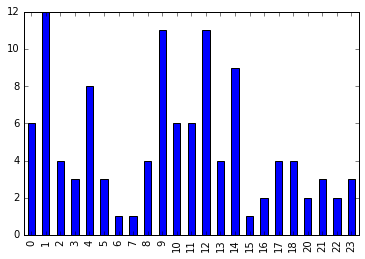

In [117]:
%pylab inline
a  = df.dt.dt.hour.value_counts()
a.sort_index().plot(kind='bar')
#.plot(kind='line')

## 使用Python 連結 SQLite

In [118]:
import sqlite3
with sqlite3.connect('test.sqlite') as con:
    cur = con.cursor()
    cur.execute('SELECT SQLITE_VERSION()')
    data = cur.fetchone()
    print(data)
    cur.close()

('3.8.11',)


In [120]:
with sqlite3.connect("test.sqlite") as con: 
    cur = con.cursor() 
    cur.execute("DROP TABLE IF EXISTS PhoneAddress") 
    cur.execute("CREATE TABLE PhoneAddress(phone CHAR(10) PRIMARY KEY, address TEXT, name TEXT unique, age INT NOT NULL)") 
    cur.execute("INSERT INTO  PhoneAddress VALUES('0912173381','United State','Jhon Doe',53)") 
    cur.execute("INSERT INTO  PhoneAddress VALUES('0928375018','Tokyo Japan','MuMu Cat',6)") 
    cur.execute("INSERT INTO  PhoneAddress VALUES('0957209108','Taipei','Richard',29)") 
    cur.close()

In [123]:
with sqlite3.connect("test.sqlite") as con: 
    cur = con.cursor() 
    cur.execute("SELECT name,age FROM PhoneAddress") 
    data = cur.fetchall() 
    for rec in data: 
        print(rec[0], rec[1])
    cur.close()

Jhon Doe 53
MuMu Cat 6
Richard 29


In [124]:
with sqlite3.connect("test.sqlite") as con: 
    cur = con.cursor() 
    cur.execute("SELECT name,age FROM PhoneAddress") 
    data1 = cur.fetchone()
    print(data1)
    data2 = cur.fetchall()
    print(data2)
    cur.close()

('Jhon Doe', 53)
[('MuMu Cat', 6), ('Richard', 29)]


## 使用pandas 保存資料

In [ ]:
# 存到 Excel
df.to_excel('sina.xlsx')
#df.to_json()

In [126]:
# 存到資料庫
with sqlite3.connect('news.sqlite') as db:
    df.to_sql('news', con = db)

In [129]:
import pandas
with sqlite3.connect('news.sqlite') as db:
    df2 = pandas.read_sql_query('SELECT title, comments FROM news ORDER BY comments DESC LIMIT 3', con = db)
df2

,title,comments
0,男子追砸运钞车被毙 其父：儿子被钓鱼一样诱杀,80102
1,破解看病难看病贵:政府或将不再插手医院内政,31784
2,天津港爆炸案一审宣判 瑞海公司董事长获死缓,29631


## 需要Cookies 的網頁

In [137]:
import requests
cookies = {'over18':'1'}
res = requests.get('https://www.ptt.cc/bbs/Gossiping/index.html', cookies = cookies)
#print(res.text)

## 增加Headers

In [145]:
import requests
headers = {
'User-Agent':'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/54.0.2840.71 Safari/537.36'    
}
res = requests.get('http://ck101.com/', headers = headers)
#print(res.text)

In [146]:
import requests
import shutil
res = requests.get('http://web.cartoonmad.com/c86cs736v62/1152/845/002.jpg', stream=True)
with open('002.jpg', 'wb') as f:
    shutil.copyfileobj(res.raw, f)

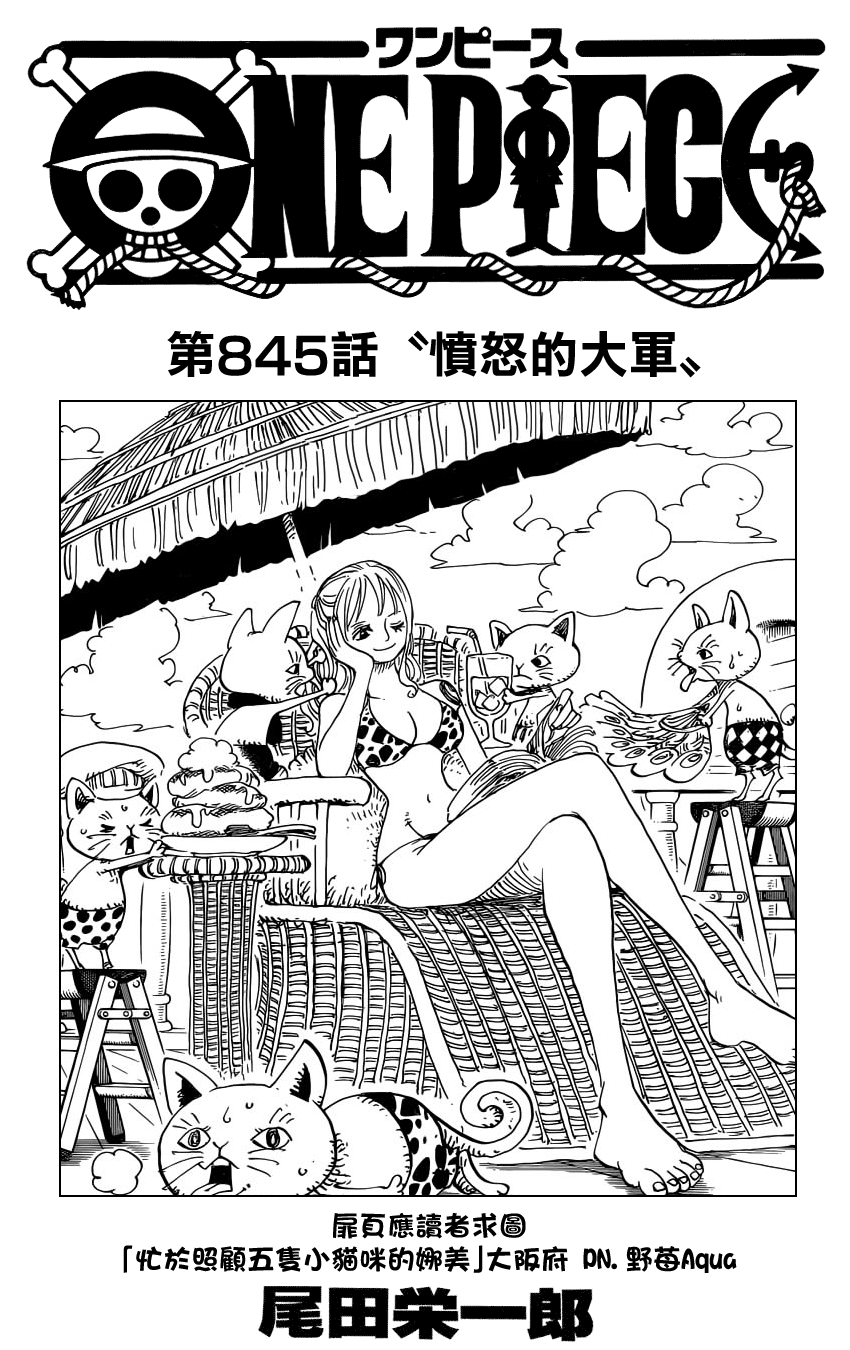

In [147]:
from PIL import Image
Image.open('002.jpg')

## 抓取影片檔

In [148]:
import requests
import shutil
res = requests.get('http://210.71.222.81/youku/030002020057E94A9A6FB43850D7B79F2CCD6D-5D96-4E38-C96A-6B7C6E00AAA8.flv?ivit=7517&original=45.112.214.146/youku/69766CD07CA498217FA1A76457/030002020057E94A9A6FB43850D7B79F2CCD6D-5D96-4E38-C96A-6B7C6E00AAA8.flv?nk=76401584390_24646099903&ns=3278100_21092700&special=true', stream=True)
with open('ppap.flv', 'wb') as f:
    shutil.copyfileobj(res.raw, f)

